In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df_emissions=pd.read_csv(r"C:\Users\21650\Downloads\emissions.csv\emissions.csv")

In [21]:
df_emissions.head()

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851


In [14]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59901 entries, 0 to 59900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         59901 non-null  int64  
 1   state-name   59901 non-null  object 
 2   sector-name  59901 non-null  object 
 3   fuel-name    59901 non-null  object 
 4   value        59901 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [22]:
df_emissions["value"].describe()

count    59901.000000
mean        35.647050
std        207.883289
min          0.000022
25%          0.793179
50%          4.197628
75%         19.413459
max       5996.429314
Name: value, dtype: float64

In [23]:
df_emissions.select_dtypes(include=["object"]).describe()

,state-name,sector-name,fuel-name
count,59901,59901,59901
unique,52,6,4
top,Illinois,Total carbon dioxide emissions from all sectors,All Fuels
freq,1190,10753,16214


In [54]:
df_by_state=df_emissions.groupby(by=["state-name"])["value"].mean()
df_by_state.sort_values(inplace=True,ascending=False)
df_by_state.head()

state-name
United States    896.963322
Texas            102.763093
California        63.576063
Pennsylvania      46.531402
Ohio              44.293094
Name: value, dtype: float64

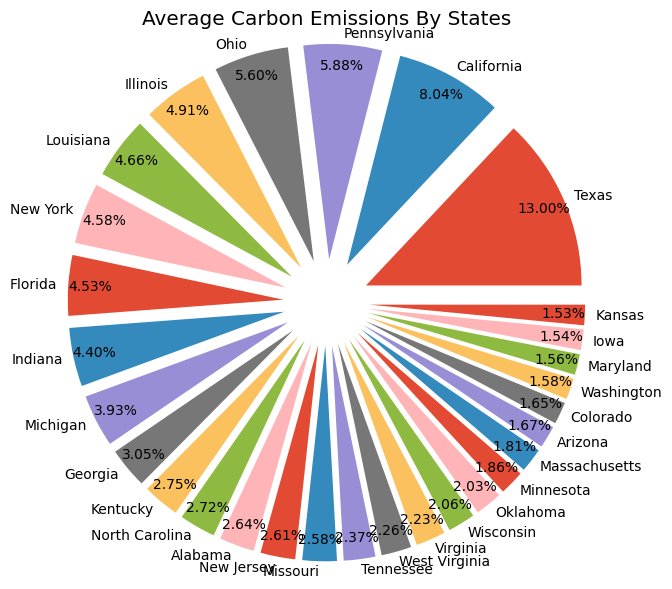

In [55]:
plt.figure(figsize=(7,7))
plt.style.use("ggplot")
plt.pie(df_by_state.values[1:30],labels=df_by_state.index[1:30],explode=[.2]*29,autopct="%.2f%%",pctdistance=.9,labeldistance=1.05)
plt.title("Average Carbon Emissions By States")
plt.show()

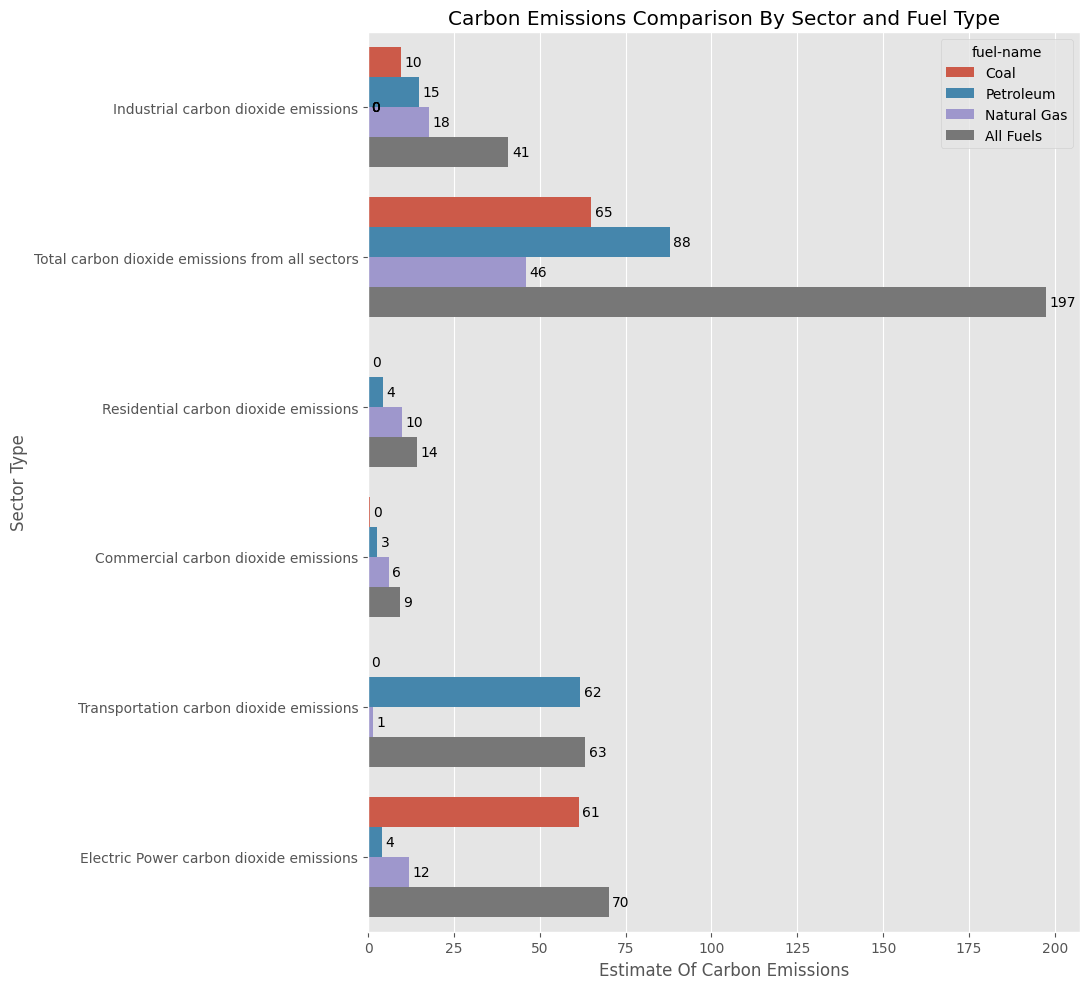

In [78]:
plt.figure(figsize=(11,10))
ax=sns.barplot(data=df_emissions,y="sector-name",x="value",hue="fuel-name",errorbar=('ci', False))
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width+1,
        p.get_y() + p.get_height() / 2,
        f'{width:.0f}',
        va='center'
    )
plt.title("Carbon Emissions Comparison By Sector and Fuel Type")
plt.xlabel("Estimate Of Carbon Emissions")
plt.ylabel("Sector Type")
plt.tight_layout()
plt.show()

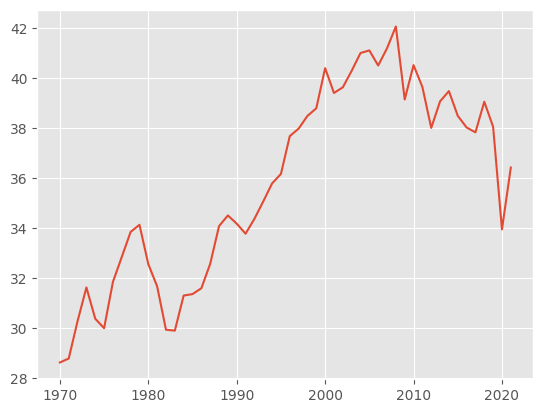

In [82]:
df_by_year=df_emissions[df_emissions[""]].groupby(by="year")["value"].agg(["mean"])
plt.plot(df_by_year.index,df_by_year.values)

In [133]:
df_emissions_total=df_emissions[(df_emissions["fuel-name"]=="All Fuels") & (df_emissions["sector-name"]=="Total carbon dioxide emissions from all sectors") & (df_emissions["state-name"]=="United States")]
df_emissions_total.reset_index(drop=True,inplace=True)
df_emissions_total.head()

,year,state-name,sector-name,fuel-name,value
0,1970,United States,Total carbon dioxide emissions from all sectors,All Fuels,4252.119759
1,1971,United States,Total carbon dioxide emissions from all sectors,All Fuels,4297.282895
2,1972,United States,Total carbon dioxide emissions from all sectors,All Fuels,4516.734358
3,1973,United States,Total carbon dioxide emissions from all sectors,All Fuels,4713.330487
4,1974,United States,Total carbon dioxide emissions from all sectors,All Fuels,4541.830703


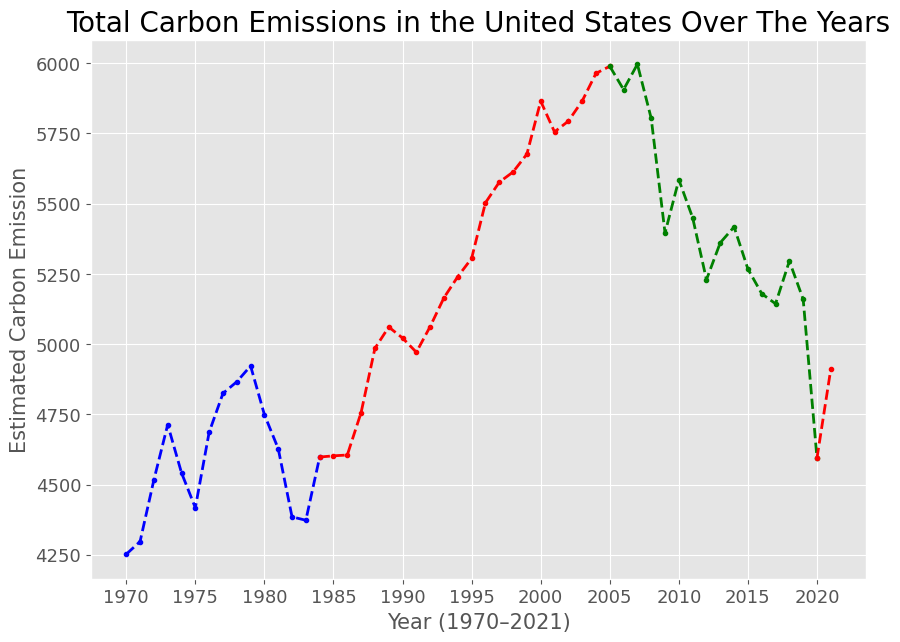

In [132]:
plt.figure(figsize=(10, 7))

plt.plot(df_emissions_total.iloc[0:15]["year"], df_emissions_total.iloc[0:15]["value"], "b--.",linewidth=2)
plt.plot(df_emissions_total.iloc[14:36]["year"], df_emissions_total.iloc[14:36]["value"], "r--.",linewidth=2)
plt.plot(df_emissions_total.iloc[35:51]["year"], df_emissions_total.iloc[35:51]["value"], "g--.",linewidth=2)
plt.plot(df_emissions_total.iloc[50:52]["year"], df_emissions_total.iloc[50:52]["value"], "r--.",linewidth=2)

plt.xticks(np.arange(1970, 2022, 5),fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Estimated Carbon Emission",fontdict={"fontsize":15})
plt.xlabel("Year (1970–2021)",fontdict={"fontsize":15})
plt.title("Total Carbon Emissions in the United States Over The Years",fontsize=20)
plt.show()

In [ ]:
df_country_year=df_emissions[(df_emissions["fuel-name"]=="All Fuels") & (df_emissions["sector-name"]=="Total carbon dioxide emissions from all sectors") & (df_emissions["state-name"]!="United States")].pivot(index="year",columns="state-name",values="value")
df_country_year.head()

state-name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1970,102.646851,11.348910,24.906189,36.178889,294.372200,43.017559,47.831994,16.072307,13.641821,104.354245,...,9.353695,77.901472,358.910969,24.392285,5.538241,86.621684,44.763398,76.973781,88.185792,18.594275
1971,98.461114,12.636423,26.998731,35.091287,305.833367,43.591690,45.894756,15.929520,11.877081,111.502511,...,9.300113,76.331326,375.778078,25.511077,5.493952,87.421056,46.125536,78.006540,84.770002,18.786527
1972,104.932504,13.420588,30.179241,37.189109,312.722261,47.467615,47.215575,16.013802,11.305789,121.679521,...,9.678573,86.988554,398.160826,25.779459,5.772615,88.681519,52.299580,89.011773,84.260328,21.663917
1973,109.563135,12.490564,34.448720,40.829866,329.285277,51.067649,48.576991,17.243519,11.850216,132.240486,...,9.446069,98.646675,434.669916,28.243561,5.927384,89.568349,57.415109,97.601594,85.443530,23.687781
1974,108.777543,12.779110,36.737072,39.112512,304.471018,50.480507,45.425744,16.657406,9.849325,124.294542,...,9.163160,90.295826,427.355095,29.613769,5.307140,84.982264,53.146294,100.314380,82.063461,23.898776


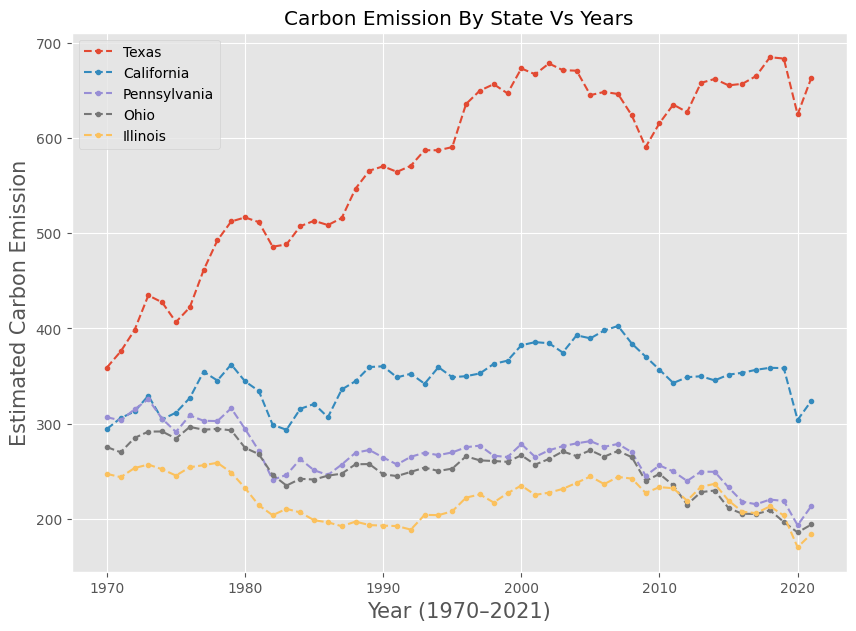

In [149]:
states_to_look_at=["Texas","California","Pennsylvania","Ohio","Illinois"]
plt.figure(figsize=(10,7))
for state in states_to_look_at:
    plt.plot(df_country_year.index,df_country_year[state],"--.")
plt.legend(states_to_look_at)
plt.title("Carbon Emission By State Vs Years")
plt.ylabel("Estimated Carbon Emission",fontdict={"fontsize":15})
plt.xlabel("Year (1970–2021)",fontdict={"fontsize":15})
plt.show()